# HOMEWORK 3: Classifying Wines with Support Vector Machines (SVM)

The objective of this exercise is to build and evaluate a Support Vector Machine (SVM) model for classifying wines based on their chemical properties using the Wine dataset available in scikit-learn. You will explore various aspects of SVM model training and optimization, including preprocessing steps, hyperparameter tuning, and kernel selection.







In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

# <b>Implement the following tasks:</b>
___

# Loading the Dataset

Load the Wine dataset using load_wine from sklearn.datasets.
Inspect the dataset to understand its structure and features.

In [2]:
from sklearn.datasets import load_wine

wine = load_wine(return_X_y=False, as_frame=True)

df = wine.frame
print(wine.DESCR)
df

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


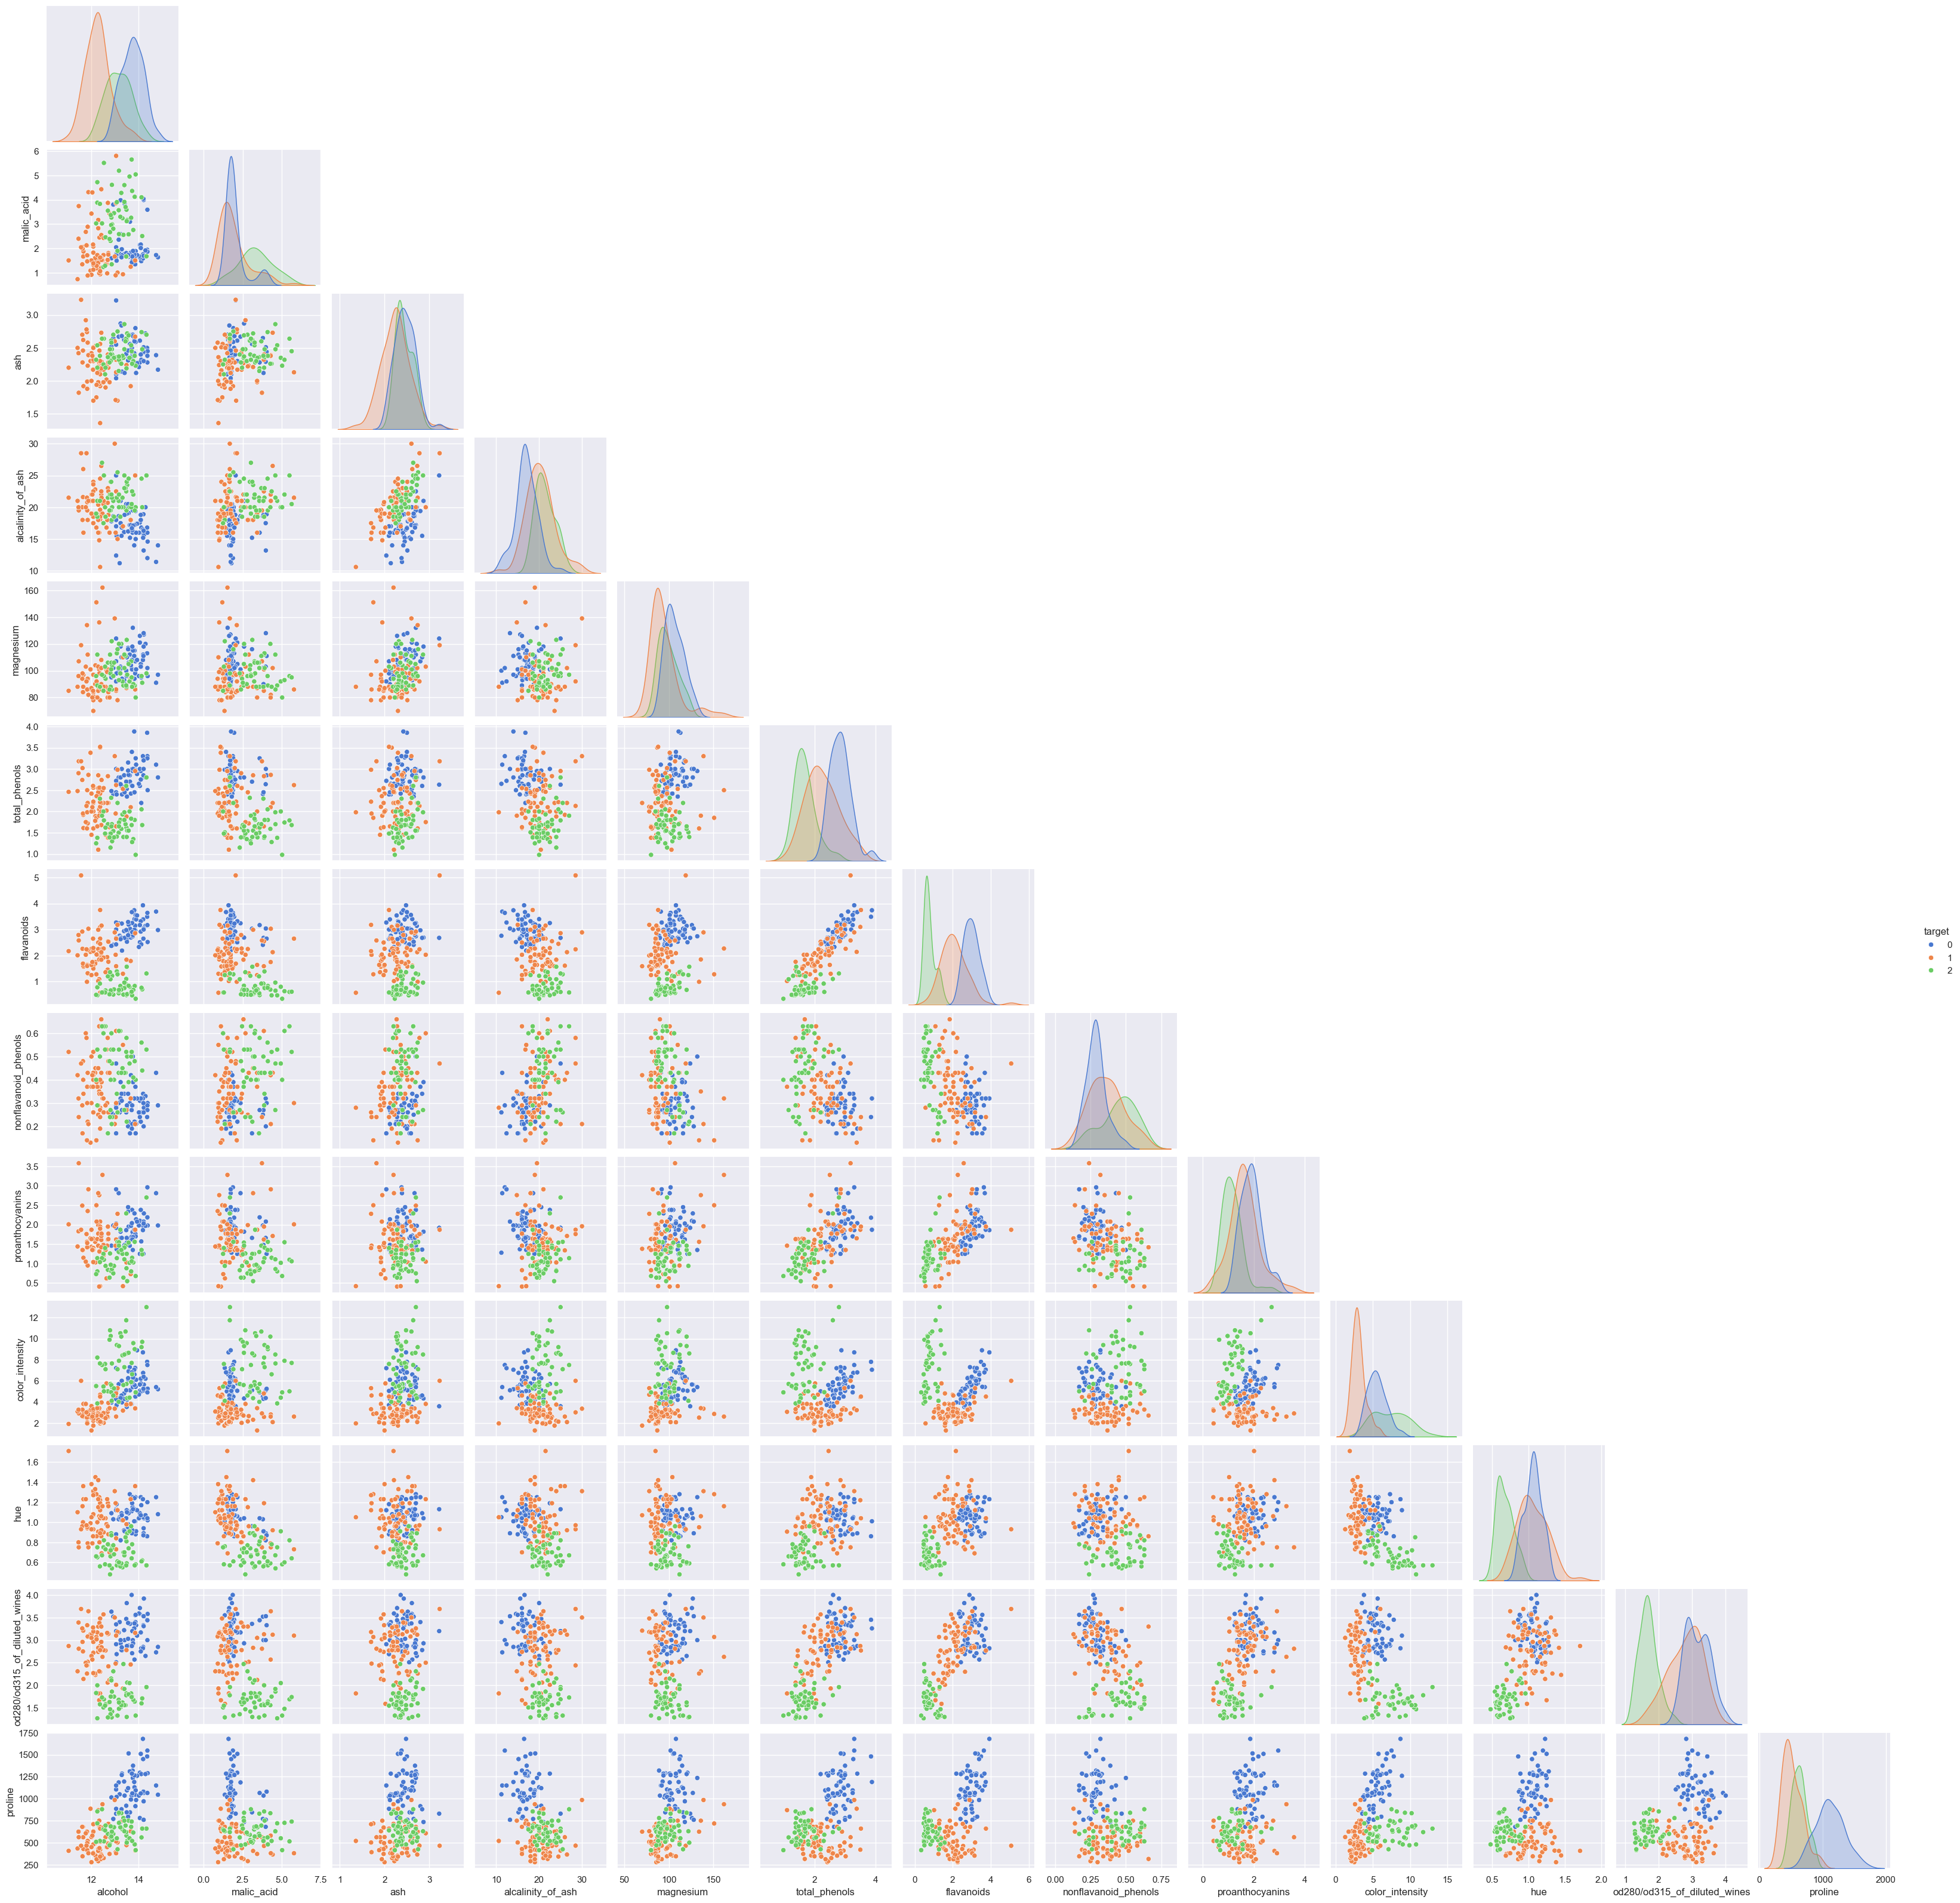

In [4]:
sns.pairplot(df, hue='target', palette='muted', corner=True);

# Data Preprocessing

- Split the dataset into features and target labels.
- Split the data into training and testing sets using train_test_split from sklearn.model_selection.

In [4]:
X, y = df.drop('target', axis=1), df['target']
display(X, y)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((142, 13), (142,), (36, 13), (36,))

# Baseline Model

Train a baseline SVM model using default hyperparameters.
Evaluate the model's performance on the testing set using metrics like accuracy, precision, recall, and F1-score. Experiment with different kernel functions (e.g., linear, polynomial, RBF) and observe their effects on model performance.

In [6]:
from sklearn.svm import SVC     # SVM for classification
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, average_precision_score

base_model = SVC(probability=True).fit(X_train, y_train)
y_pred = base_model.predict(X_test)

print('Baseline model performance:\n')
print(classification_report(y_test, y_pred))

print('Multiclass overall AUC ROC (weighted avg, OvR method):', end=' ')
print(roc_auc_score(y_test, base_model.predict_proba(X_test), multi_class='ovr', average='weighted'))

print('Multiclass overall AUC PR (weighted avg, OvR method):', end=' ')
print(average_precision_score(y_test, base_model.predict_proba(X_test), average='weighted'))

Baseline model performance:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36

Multiclass overall AUC ROC (weighted avg, OvR method): 0.9255050505050504
Multiclass overall AUC PR (weighted avg, OvR method): 0.8255683503039024


It's clear that the model performs perfect for Class 0, however the performance for Class 1 drops somewhat and for Class 2 it performs poorly. We can do beter with some data preprocessing and model tuning.

# Data Normalization

Standardize the features using StandardScaler from sklearn.preprocessing.
Explore the effects of data normalization on model performance with different normalization techniques.

In [15]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(probability=True).fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Model performance after scaling:\n')
print(classification_report(y_test, y_pred))

print('Multiclass overall AUC ROC (weighted avg, OvR method):', end=' ')
print(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted'))

print('Multiclass overall AUC PR (weighted avg, OvR method):', end=' ')
print(average_precision_score(y_test, model.predict_proba(X_test), average='weighted'))

Model performance after scaling:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Multiclass overall AUC ROC (weighted avg, OvR method): 1.0
Multiclass overall AUC PR (weighted avg, OvR method): 1.0


After scaling the data to have zero mean and unit variance, it becomes very clear that the SVM is not invariant to the scale of the data. Impressively, it achieves perfect performance without any tuning (of course this can depend on the train-test split). This may mean that further hyperparameter tuning is redundant, however the model could have overfited to the trainig data, so cross validation is always useful when possible.

# Hyperparameter Tuning

Perform hyperparameter tuning to find the best combination of hyperparameters for the SVM model.
Tune hyperparameters such as C (regularization parameter) and the choice of kernel (linear, polynomial, RBF).
Use techniques like GridSearchCV or RandomizedSearchCV from sklearn.model_selection to efficiently search through the hyperparameter space.

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import make_scorer

param_grid = {
    'C': np.logspace(-4, 4, 15),
    'gamma': list((np.logspace(-3, 3, 15))) + ['scale'],    # dosn't affect linear kernel
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=cv, n_jobs=-1, scoring='roc_auc_ovr_weighted')
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'C': 0.019306977288832496, 'gamma': 0.001, 'kernel': 'linear'}
Best score: 1.0


The best kernel is linear and the best value for C is 0.019, with the gamma parameter irrelevant since the linear kernel does not use it. Even with cross-validation, the model maintains a perfect score of 1 for the multiclass AUC ROC.

# Effects of Data Size

Explore the effects of varying the size of the training data on model performance.
Train SVM models using different proportions of the training data (change the number of CV folds) and observe how performance changes. Visualize the relationship between training size and model performance.

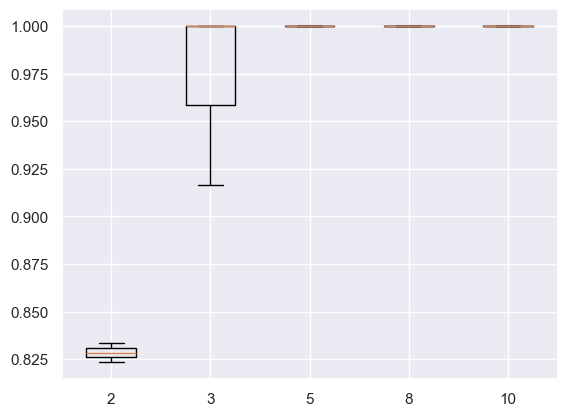

In [630]:
scores = []
n_folds = [2, 3, 5, 8, 10]
best_model = grid_search.best_estimator_

for folds in n_folds:
    cv = KFold(n_splits=folds, shuffle=True, random_state=42)
    score = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    scores.append(score)

plt.boxplot(scores, labels=n_folds);

We can see from the plot that as the number of folds increases, the performance of the model increases as well. This is expected since it provides us with a larger sample size to average performance over.

# Model Evaluation

Evaluate the final tuned SVM model on the testing set using various performance metrics.
Plot confusion matrices to visualize the model's predictions.
Discuss the results and insights gained from the experimentation.

In [26]:
best_model = grid_search.best_estimator_.fit(X_train, y_train)

print('Final model performance:\n')
print(classification_report(y_test, best_model.predict(X_test)))

print('Multiclass overall AUC ROC (weighted avg, OvR method):', end=' ')
print(roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr', average='weighted'))

print('Multiclass overall AUC PR (weighted avg, OvR method):', end=' ')
print(average_precision_score(y_test, best_model.predict_proba(X_test), average='weighted'))

Final model performance:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.98      0.96      0.97        50
           2       0.97      1.00      0.98        31

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125

Multiclass overall AUC ROC (weighted avg, OvR method): 0.9984474074074073
Multiclass overall AUC PR (weighted avg, OvR method): 0.9975630379406071


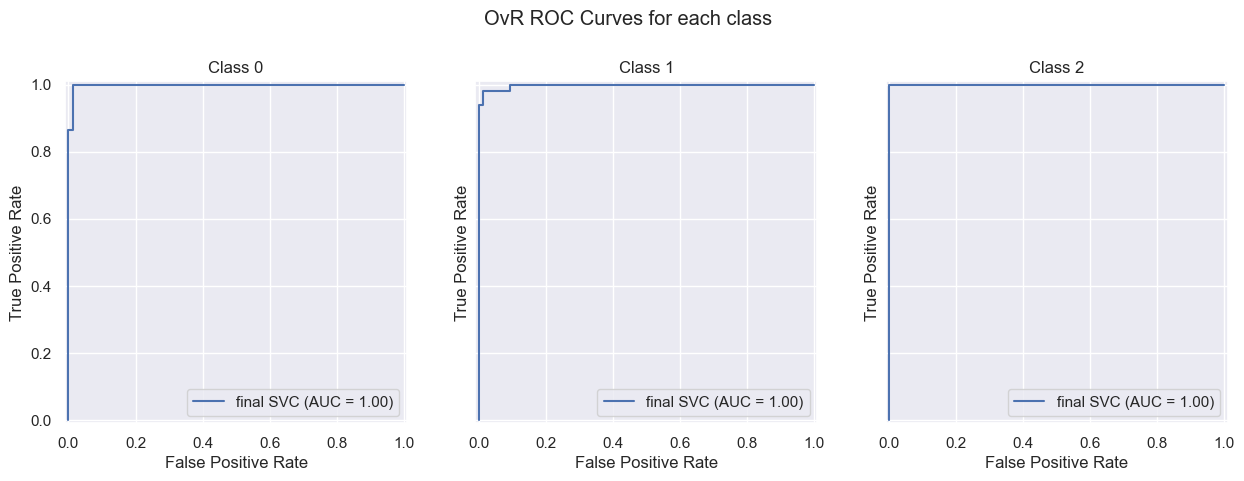

In [29]:
from sklearn.metrics import RocCurveDisplay

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
fig.suptitle('OvR ROC Curves for each class')

pred_prob = best_model.predict_proba(X_test)
for i, ax in enumerate(axs):
    RocCurveDisplay.from_predictions(y_test == i, pred_prob[:, i], ax=ax, name='final SVC')
    ax.set_title(f'Class {i}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
plt.show()

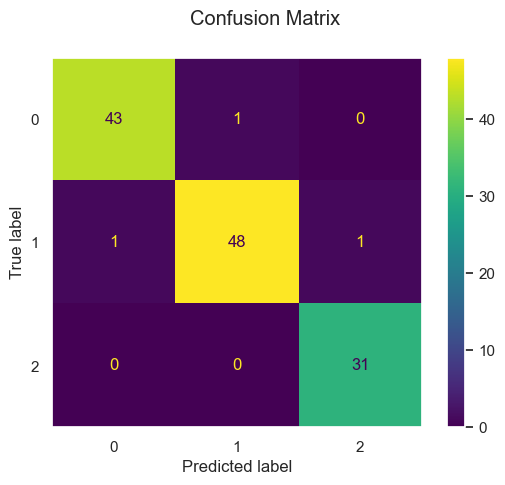

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_disp = ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test))
cm_disp.figure_.suptitle('Confusion Matrix')
plt.grid(False)

Evaluating the final model on the test dataset, we can see that the performance is impressive, and significantly improved over the baseline model. Furthermore, it may appear that the model has worse performance that the untuned model after scaling, however as previously mentioned the untuned model may have overfitted to the training data. The tuned model has a more realistic performance and is more likely to generalize to new data. However we can never be sure unless testing on truly unseen data. What is sure is that one should always remember to scale their data before feeding it to an SVM :)